### Import Libraries

In [54]:
!pip install mapie==0.9.1
!pip install xgboost

In [55]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
import xgboost as xgb

# Import MAPIE to calculate prediction intervals
from mapie.regression import MapieRegressor

# To calculate coverage score
from mapie.metrics import regression_coverage_score

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [56]:
# Import Data
df = pd.read_csv('traffic_volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,10/2/12 9:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,10/2/12 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,10/2/12 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,10/2/12 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,10/2/12 13:00,4918


In [57]:
df['holiday'] = df['holiday'].apply(lambda x: 1 if x != 'None' else 0)

df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month_name()
df['weekday'] = df['date_time'].dt.day_name()
df['hour'] = df['date_time'].dt.hour
df = df.drop('date_time', axis=1)
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,month,weekday,hour
0,1,288.28,0.0,0.0,40,Clouds,5545,October,Tuesday,9
1,1,289.36,0.0,0.0,75,Clouds,4516,October,Tuesday,10
2,1,289.58,0.0,0.0,90,Clouds,4767,October,Tuesday,11
3,1,290.13,0.0,0.0,90,Clouds,5026,October,Tuesday,12
4,1,291.14,0.0,0.0,75,Clouds,4918,October,Tuesday,13
...,...,...,...,...,...,...,...,...,...,...
48199,1,283.45,0.0,0.0,75,Clouds,3543,September,Sunday,19
48200,1,282.76,0.0,0.0,90,Clouds,2781,September,Sunday,20
48201,1,282.73,0.0,0.0,90,Thunderstorm,2159,September,Sunday,21
48202,1,282.09,0.0,0.0,90,Clouds,1450,September,Sunday,22


In [58]:
# Select input and output features
X = df.drop(columns = ['traffic_volume'])
y = df['traffic_volume']

In [59]:
# One hot encoding for categorical variables
X_encoded = pd.get_dummies(X)
X_encoded.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,hour,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,...,month_November,month_October,month_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,288.28,0.0,0.0,40,9,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,1,289.36,0.0,0.0,75,10,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,1,289.58,0.0,0.0,90,11,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,1,290.13,0.0,0.0,90,12,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,291.14,0.0,0.0,75,13,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [60]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1)


### Implement XGBoost

In [61]:
# Define your model
xg = xgb.XGBRegressor(random_state=1)

In [62]:
# Fit the model
start = time.time()            # Start Time
xg.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.3267195224761963s


#### Evaluate Prediction Performance on Train Set

In [63]:
# Predict Test Set
y_pred_train = xg.predict(train_X)

# Evaluate the model on train set
r2 = sklearn.metrics.r2_score(train_y, y_pred_train)
print('R-squared on Train Set: %0.2f' %r2)

RMSE_test = sklearn.metrics.root_mean_squared_error(train_y, y_pred_train)
print('RMSE on Train Set: %0.2f' %RMSE_test)

R-squared on Train Set: 0.97
RMSE on Train Set: 366.21


#### Evaluate Prediction Performance on Test Set

In [64]:
# Predict Test Set
y_pred = xg.predict(test_X)

# Evaluate the model on test set
r2 = sklearn.metrics.r2_score(test_y, y_pred)
print('R-squared on Test Set: %0.2f' %r2)

RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
print('RMSE on Test Set: %0.2f' %RMSE_test)

R-squared on Test Set: 0.96
RMSE on Test Set: 417.29


#### Histogram of Residuals/Errors 

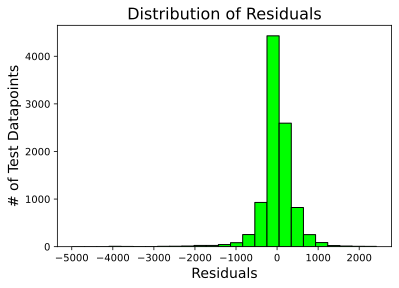

In [65]:
# Calculate the residuals by subtracting the predicted values from the actual test values
all_residuals = test_y - y_pred

# Set up the figure with custom size and resolution (DPI)
plt.figure(figsize=(6, 4), dpi = 150)

# Plot the histogram of residuals
plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

# Label X and Y axes
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('# of Test Datapoints', fontsize = 14)

# Set the title of the plot
plt.title('Distribution of Residuals', fontsize = 16)

# Adjust the font size of x and y ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

# Show the plot
plt.show()

#### Scatter Plot of Predicted Vs. Actual Values

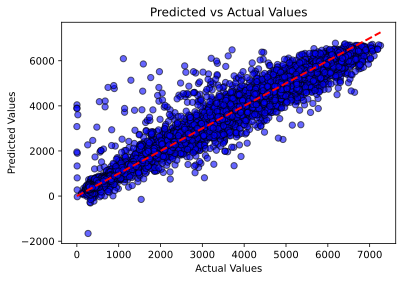

In [66]:
# Setting the figure size and resolution
plt.figure(figsize = (6, 4), dpi = 150)

# Scatter plot of actual vs predicted values
plt.scatter(test_y, y_pred, color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

# 45-degree reference line (perfect predictions)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

# Axis labels and title
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10)
plt.title('Predicted vs Actual Values', fontsize = 12)

# Adjust ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

# Show the plot
plt.show()

#### Feature Importance Plot

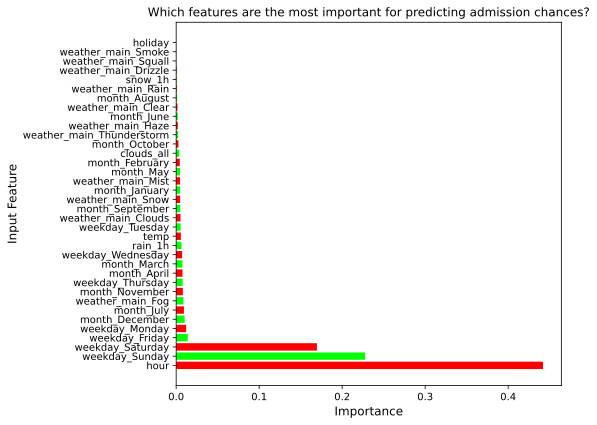

In [67]:
# Storing importance values from the trained model
importance = xg.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(8, 6))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for predicting admission chances?', fontsize = 12) 
plt.yticks(fontsize = 10) # fontsize of yticks
plt.xticks(fontsize = 10) # fontsize of xticks

plt.tight_layout();

plt.show()

#### **Prediction Intervals using MAPIE Regressor**

***MAPIE: Model Agnostic Prediction Interval Estimator***

- It is a Python library designed to estimate prediction intervals in a **model-agnostic way**.
- It can be used with **any machine learning model**, including linear models, decision trees, ensemble methods, and neural networks.

In [70]:
#Used AI to help deal with memory issues with large dataset
# Define MAPIE regressor
mapie = MapieRegressor(
    estimator=xg,       # Prediction model to use
    n_jobs=1,           # Use all CPU cores
    random_state=42
)

# Fit MAPIE regressor on training data
start = time.time()
mapie.fit(train_X, train_y)
stop = time.time()
print(f"Training time: {stop - start:.2f}s")

alpha = 0.1  # For 90% confidence level

# Predict in smaller batches to prevent MemoryError
import numpy as np

batch_size = 1000  # You can adjust this (e.g., 500 or 2000 depending on memory)
y_pred_list, y_pis_list = [], []

for i in range(0, len(test_X), batch_size):
    X_batch = test_X[i:i + batch_size]
    y_pred_batch, y_pis_batch = mapie.predict(X_batch, alpha=alpha)
    y_pred_list.append(y_pred_batch)
    y_pis_list.append(y_pis_batch)
    print(f"Processed batch {i // batch_size + 1}/{len(test_X) // batch_size + 1}")

# Combine all predictions
y_test_pred = np.concatenate(y_pred_list)
y_test_pis = np.concatenate(y_pis_list)

print("Batch prediction complete.")


Training time: 1.61s
Processed batch 1/10
Processed batch 2/10
Processed batch 3/10
Processed batch 4/10
Processed batch 5/10
Processed batch 6/10
Processed batch 7/10
Processed batch 8/10
Processed batch 9/10
Processed batch 10/10
Batch prediction complete.


In [71]:
# Predicted values
y_test_pred

array([ 892.0932, 1205.5419, 1976.1171, ..., 1656.4924, 4602.635 ,
       4534.493 ], dtype=float32)

In [72]:
# Prediction Intervals
y_test_pis

array([[[ 320.66827393],
        [1452.37286377]],

       [[ 618.62084961],
        [1764.24243164]],

       [[1452.80493164],
        [2599.62963867]],

       ...,

       [[1032.39013672],
        [2163.87109375]],

       [[4094.76464844],
        [5236.60498047]],

       [[4122.06347656],
        [5267.92626953]]])

In [73]:
# Storing results in a dataframe
predictions = test_y.to_frame()
predictions.columns = ['Actual Value']
predictions["Predicted Value"] = y_test_pred.round(2)
predictions["Lower Value"] = y_test_pis[:, 0].round(2)
predictions["Upper Value"] = y_test_pis[:, 1].round(2)

# Take a quick look
predictions.tail(5)

,Actual Value,Predicted Value,Lower Value,Upper Value
36845,4720,4616.720215,3941.19,5074.77
9943,3185,2109.659912,1560.51,2705.33
19981,1741,1656.489990,1032.39,2163.87
19918,4611,4602.629883,4094.76,5236.60
28318,4556,4534.490234,4122.06,5267.93


### **Coverage Calculation**
- **Coverage** refers to the proportion of true/actual values that fall within the prediction intervals generated by a model.

- It is a measure of how well the prediction intervals capture the actual values.

  $\text{Coverage} = \frac{\text{Number of actual values within prediction intervals}}{\text{Total number of actual values}}$

In [74]:
coverage = regression_coverage_score(test_y,           # Actual values
                                     y_test_pis[:, 0], # Lower bound of prediction intervals
                                     y_test_pis[:, 1]) # Upper bound of prediction intervals

coverage_percentage = coverage * 100
print(f"Coverage: {coverage_percentage:.2f}%")

Coverage: 91.06%


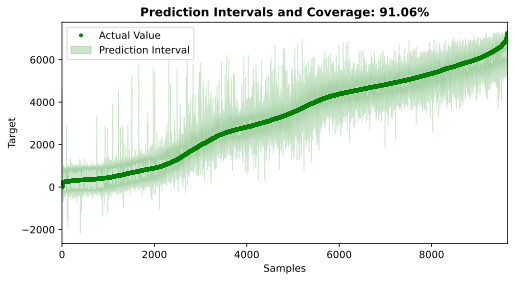

In [75]:
# Sort the predictions by 'Actual Value' for better visualization and reset the index
sorted_predictions = predictions.sort_values(by=['Actual Value']).reset_index(drop=True)

# Create a figure and axis object with specified size and resolution
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the actual values with green dots
plt.plot(sorted_predictions["Actual Value"], 'go', markersize=3, label="Actual Value")

# Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
plt.fill_between(np.arange(len(sorted_predictions)),
                 sorted_predictions["Lower Value"],
                 sorted_predictions["Upper Value"],
                 alpha=0.2, color="green", label="Prediction Interval")

# Set font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the limit for the x-axis to cover the range of samples
plt.xlim([0, len(sorted_predictions)])

# Label the x-axis and y-axis with appropriate font size
plt.xlabel("Samples", fontsize=10)
plt.ylabel("Target", fontsize=10)

# Add a title to the plot, including the coverage percentage, with bold formatting
plt.title(f"Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

# Add a legend to the plot, placed in the upper left, with specified font size
plt.legend(loc="upper left", fontsize=10);
plt.show()

### Save Model

In [76]:
# Creating the file where we want to write the model
xg_pickle = open('xg_traffic.pickle', 'wb') 

# Write RF model to the file
pickle.dump(mapie, xg_pickle) 

# Close the file
xg_pickle.close()